In [1]:
import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### container usage

| name | type | description |
|---|---|---|
| container_id    | string     | uid of a container |
| machine_id      | string     | uid of container's host machine |
| time_stamp      | double     | time stamp, in second |
| cpu_util_percent | bigint     | |
| mem_util_percent | bigint     | |
| cpi             | double     | |
| mem_gps         | double     | normalized memory bandwidth, [0, 100] |
| mpki            | bigint     | |
| net_in          | double     | normarlized in coming network traffic, [0, 100] |
| net_out         | double     | normarlized out going network traffic, [0, 100] |
| disk_io_percent | double     | [0, 100], abnormal values are of -1 or 101  |

In [2]:
col_names = ['container_id', 'machine_id', 'time_stamp', 'cpu_util_percent', 'mem_util_percent', 
           'cpi', 'mem_gps', 'mpki', 'net_in', 'net_out', 'disk_io_percent']
container_usage = pd.read_csv('container_usage_reduced.csv', names=col_names, skiprows=1)
container_usage

,container_id,machine_id,time_stamp,cpu_util_percent,mem_util_percent,cpi,mem_gps,mpki,net_in,net_out,disk_io_percent
0,NaN,m_108,698570,14,64,1.56,0.00,0.0,0.00,0.00,4.0
1,NaN,m_108,698620,12,64,1.46,0.03,0.0,0.00,0.00,4.0
2,NaN,m_108,698670,10,64,1.74,0.00,0.0,0.00,0.00,5.0
3,NaN,m_108,699740,7,65,1.57,0.02,0.0,0.00,0.00,6.0
4,NaN,m_108,700010,8,64,1.90,0.00,0.0,0.00,0.00,4.0
...,...,...,...,...,...,...,...,...,...,...,...
999995,c_10997,m_3044,306020,29,100,NaN,NaN,NaN,0.21,0.17,2.0
999996,c_10997,m_3044,306210,22,100,NaN,NaN,NaN,0.21,0.17,3.0
999997,c_10997,m_3044,306720,29,100,NaN,NaN,NaN,0.21,0.17,2.0
999998,c_10997,m_3044,309020,24,100,NaN,NaN,NaN,0.21,0.17,4.0


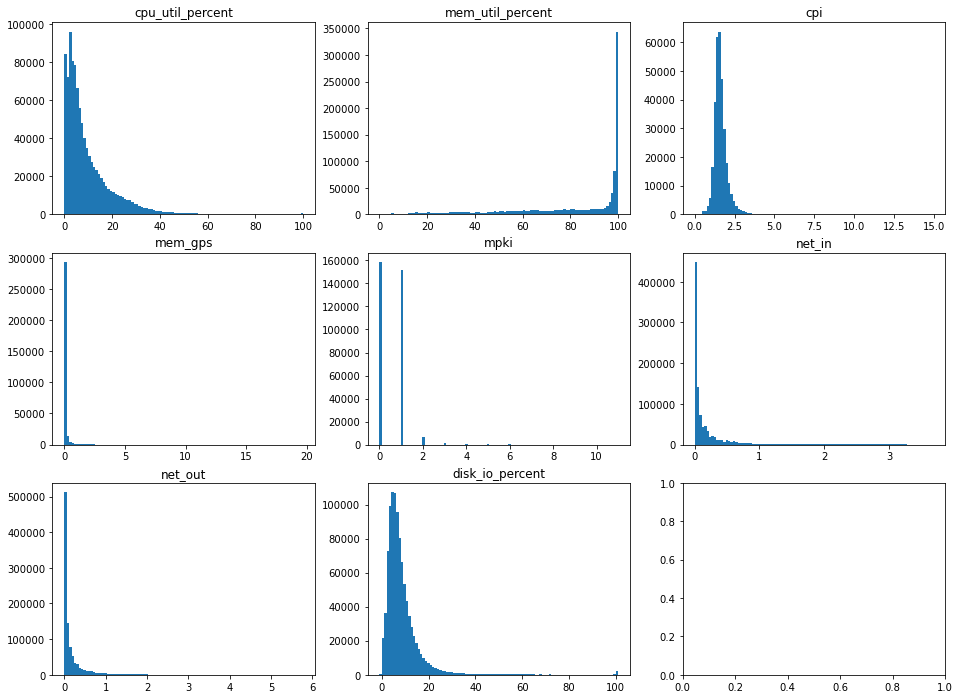

In [4]:
fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for ax, col in zip(axs.flatten(), 
                   ['cpu_util_percent', 'mem_util_percent', 'cpi', 'mem_gps', 'mpki', 
                    'net_in', 'net_out', 'disk_io_percent']):
    ax.hist(container_usage[col], bins=100)
    ax.set_title(col)

<AxesSubplot:xlabel='mpki', ylabel='cpi'>

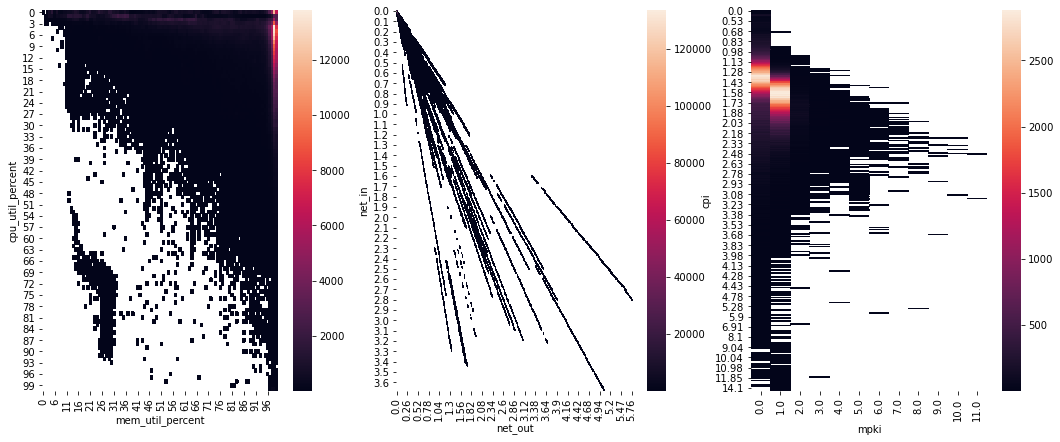

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(18, 7))

cpu_mem_df = container_usage.groupby(['cpu_util_percent', 'mem_util_percent']).size()
cpu_mem_df = cpu_mem_df.to_frame().rename(columns={0: 'count'}).reset_index()
sns.heatmap(cpu_mem_df.pivot('cpu_util_percent', 'mem_util_percent', 'count'), ax=axs[0])

net_in_out_df = container_usage.groupby(['net_in', 'net_out']).size()
net_in_out_df = net_in_out_df.to_frame().rename(columns={0: 'count'}).reset_index()
sns.heatmap(net_in_out_df.pivot('net_in', 'net_out', 'count'), ax=axs[1])

cpi_mpki_df = container_usage.groupby(['cpi', 'mpki']).size()
cpi_mpki_df = cpi_mpki_df.to_frame().rename(columns={0: 'count'}).reset_index()
sns.heatmap(cpi_mpki_df.pivot('cpi', 'mpki', 'count'), ax=axs[2])

### batch task

| name | type | description |
|---|---|---|
| task_name       | string     | task name. unique within a job              |
| instance_num    | bigint     | number of instances                         |
| job_name        | string     | job name                                    |
| task_type       | string     | task type                                   |
| status          | string     | task status                                 |
| start_time      | bigint     | start time of the task                      |
| end_time        | bigint     | end of time the task                        |
| plan_cpu        | double     | number of cpu needed by the task, 100 is 1 core |
| plan_mem        | double     | normalized memorty size, [0, 100]           |

In [ ]:
#col_names = ['task_name', 'instance_num', 'job_name', 'task_type', 'status', 'start_time', 'end_time', 
#             'plan_cpu', 'plan_mem']
#batch_task = pd.read_csv('batch_task.csv', names=col_names)
# 14295731
#batch_task = batch_task[batch_task['status'] == 'Terminated']
# 14059143
#batch_task['task_type'].unique()
# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
#batch_task = batch_task[['task_name', 'instance_num', 'job_name', 'start_time', 'end_time', 'plan_cpu', 'plan_mem']]
#batch_task.to_csv('batch_task_reduced.csv', index=False) # To do again

In [2]:
batch_tasks = pd.read_csv('batch_task_reduced.csv')
batch_tasks = batch_tasks[(batch_tasks['time_taken'] > 0) & (batch_tasks['time_taken'] < 10000)]
batch_tasks

,task_name,instance_num,job_name,start_time,end_time,plan_cpu,plan_mem,time_taken
1,R2_1,1.0,j_2,87076,87086,50.0,0.20,10
2,M1,1.0,j_2,87076,87083,50.0,0.20,7
3,R6_3,371.0,j_3,157297,157325,100.0,0.49,28
4,J4_2_3,1111.0,j_3,157329,157376,100.0,0.59,47
5,R2_1,1.0,j_3,157322,157328,100.0,0.39,6
...,...,...,...,...,...,...,...,...
14059137,M1,1.0,j_4201003,149574,149575,100.0,0.30,1
14059138,M3,1.0,j_4201003,149574,149575,100.0,0.30,1
14059139,M2,1.0,j_4201003,149574,149575,100.0,0.30,1
14059141,M1,1.0,j_4201007,171940,171943,50.0,0.30,3


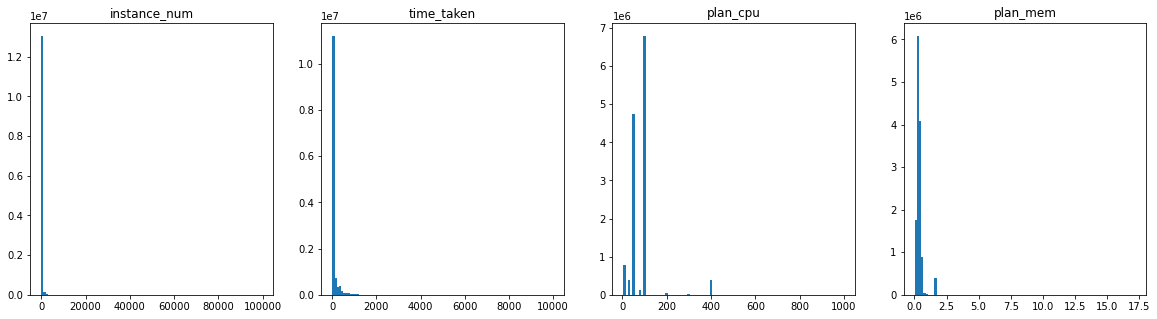

In [3]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for ax, col in zip(axs, ['instance_num', 'time_taken', 'plan_cpu', 'plan_mem']):
    ax.set_title(col)
    ax.hist(batch_tasks[col], bins=100)

In [16]:
batch_tasks = batch_tasks[(batch_tasks['instance_num'] == 1) & 
                          (15 <= batch_tasks['time_taken']) & (batch_tasks['time_taken'] < 3600) & 
                          (0 < batch_tasks['plan_cpu']) & (batch_tasks['plan_cpu'] < 600) & 
                          (0 < batch_tasks['plan_mem']) & (batch_tasks['plan_mem'] < 4)]
batch_tasks

,task_name,instance_num,job_name,start_time,end_time,plan_cpu,plan_mem,time_taken
16,R16_15,1.0,j_8,316284,316310,50.0,0.20,26
19,R15_14,1.0,j_8,316284,316310,50.0,0.20,26
23,J12_10_11,1.0,j_8,316284,316302,50.0,0.20,18
27,R14_13,1.0,j_8,316284,316310,50.0,0.20,26
29,R17_16,1.0,j_8,316284,316310,50.0,0.20,26
...,...,...,...,...,...,...,...,...
14059103,J4_1_3,1.0,j_4200937,511792,511842,50.0,0.20,50
14059110,task_LTE4NjUxMjg5NDY5MDI4NjAzNzU=,1.0,j_4200945,344942,345000,5.0,0.03,58
14059113,R3_2,1.0,j_4200947,681856,681921,100.0,0.39,65
14059124,task_LTE4NjUxMjg5NDY5MDI4NjAzNzU=,1.0,j_4200958,529743,530148,5.0,0.03,405


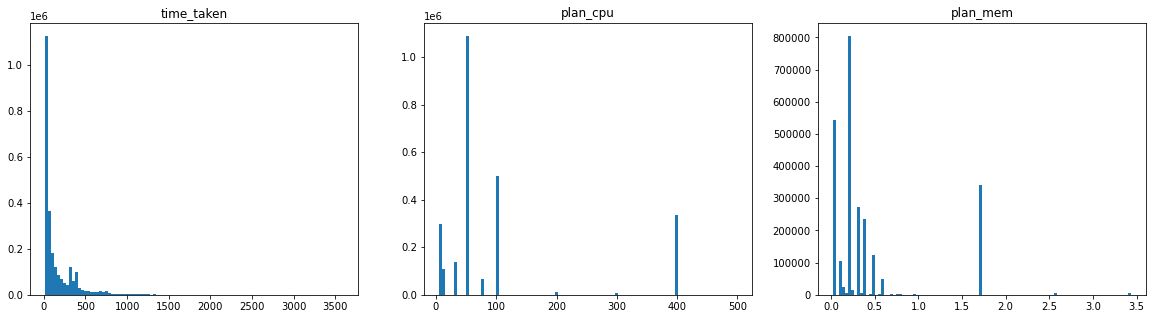

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
for ax, col in zip(axs, ['time_taken', 'plan_cpu', 'plan_mem']):
    ax.set_title(col)
    ax.hist(batch_tasks[col], bins=100)

<AxesSubplot:xlabel='plan_mem', ylabel='plan_cpu'>

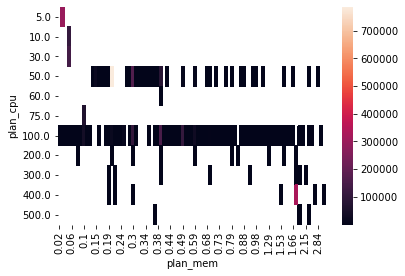

In [15]:
cpu_mem_df = batch_tasks.groupby(['plan_cpu', 'plan_mem']).size()
cpu_mem_df = cpu_mem_df.to_frame().rename(columns={0: 'count'}).reset_index()
sns.heatmap(cpu_mem_df.pivot('plan_cpu', 'plan_mem', 'count'))

### batch instance

| name | type | description |
|---|---|---|
| instance_name   | string     | instance name of the instance |
| task_name       | string     | name of task to which the instance belong |
| job_name        | string     | name of job to which the instance belong |
| task_type       | string     | task type |
| status          | string     | instance status |
| start_time      | bigint     | start time of the instance |
| end_time        | bigint     | end time of the instance |
| machine_id      | string     | uid of host machine of the instance |
| seq_no          | bigint     | sequence number of this instance |
| total_seq_no    | bigint     | total sequence number of this instance |
| cpu_avg         | double     | average cpu used by the instance, 100 is 1 core  |
| cpu_max         | double     | average memory used by the instance (normalized) |
| mem_avg         | double     | max cpu used by the instance, 100 is 1 core      |
| mem_max         | double     | max memory used by the instance (normalized, [0, 100]) |

In [12]:
col_names = ['instance_name', 'task_name', 'job_name', 'task_type', 'status', 'start_time', 'end_time', 
             'machine_id', 'seq_no', 'total_seq_no', 'cpu_avg', 'cpu_max', 'mem_avg', 'mem_max']
batch_instance = pd.read_csv('batch_instance_reduced.csv', names=col_names)
batch_instance = batch_instance[batch_instance['status'] == 'Terminated']
batch_instance

,instance_name,task_name,job_name,task_type,status,start_time,end_time,machine_id,seq_no,total_seq_no,cpu_avg,cpu_max,mem_avg,mem_max
NaN,ins_74901673,task_LTg0MTUwNTA5Mjg4MDkwNjIzMA==,j_217,10,Terminated,673795,673797,m_2637,1,1.1,13.0,16.0,0.02,0.02.1
0.0,ins_815802872,M1,j_1527,1,Terminated,158478,158520,m_3430,1,1.0,3.0,19.0,0.13,0.18
1.0,ins_564677701,M1,j_2014,1,Terminated,372602,372616,m_1910,1,1.0,87.0,116.0,0.04,0.05
2.0,ins_257566161,M1,j_2014,1,Terminated,372602,372615,m_2485,1,1.0,91.0,123.0,0.05,0.05
3.0,ins_688679908,M1,j_2014,1,Terminated,372602,372615,m_993,1,1.0,93.0,141.0,0.05,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995.0,ins_553754711,M1,j_24283,1,Terminated,99209,99236,m_3927,1,1.0,39.0,88.0,0.05,0.06
9996.0,ins_1143491323,M1,j_24283,1,Terminated,99208,99239,m_1881,1,1.0,32.0,150.0,0.04,0.06
9997.0,ins_862037193,M1,j_24283,1,Terminated,99208,99241,m_1552,1,1.0,41.0,101.0,0.05,0.1
9998.0,ins_1076678316,M1,j_24283,1,Terminated,99207,99231,m_309,1,1.0,37.0,101.0,0.05,0.07


### Generate the alibaba model

In [6]:
batch_task_instances = pd.read_csv('batch_task_instances.csv')
batch_task_instances = batch_task_instances[10 <= batch_task_instances['time_taken']]
batch_task_instances

,task_name,job_name,time_taken,plan_cpu,plan_mem,cpu_avg,cpu_max,mem_avg,mem_max
3,R8_7,j_1514793,10,50.0,0.30,30.0,103.0,0.07,0.09
30,R3_2,j_350452,12,100.0,0.39,2.0,21.0,0.20,0.20
44,R2_1,j_364712,54,50.0,0.30,76.0,112.0,0.18,0.21
61,R5_4,j_352799,13,100.0,0.39,2.0,52.0,0.04,0.05
64,R2_1,j_353287,38,100.0,0.39,4.0,77.0,0.19,0.19
...,...,...,...,...,...,...,...,...,...
152036,R4_3,j_4047900,55,50.0,0.20,6.0,101.0,0.03,0.08
152037,M2,j_4048765,10,100.0,0.30,96.0,277.0,0.07,0.09
152039,J3_2,j_4048765,29,100.0,0.59,73.0,175.0,0.81,0.86
152051,R2_1,j_4068881,12,100.0,0.39,6.0,74.0,0.15,0.16


In [7]:
batch_task_instances['total cpu'] = batch_task_instances['cpu_avg'] * batch_task_instances['time_taken']
batch_task_instances = batch_task_instances[(batch_task_instances['plan_cpu'] >= batch_task_instances['cpu_avg']) & 
                                            (batch_task_instances['plan_mem'] >= batch_task_instances['mem_max'])]
batch_task_instances

,task_name,job_name,time_taken,plan_cpu,plan_mem,cpu_avg,cpu_max,mem_avg,mem_max,total cpu
3,R8_7,j_1514793,10,50.0,0.30,30.0,103.0,0.07,0.09,300.0
30,R3_2,j_350452,12,100.0,0.39,2.0,21.0,0.20,0.20,24.0
61,R5_4,j_352799,13,100.0,0.39,2.0,52.0,0.04,0.05,26.0
64,R2_1,j_353287,38,100.0,0.39,4.0,77.0,0.19,0.19,152.0
71,M1,j_370100,31,100.0,0.20,4.0,83.0,0.16,0.16,124.0
...,...,...,...,...,...,...,...,...,...,...
152034,R5_4,j_4047900,55,50.0,0.20,0.0,66.0,0.05,0.06,0.0
152035,R3_2,j_4047900,53,50.0,0.30,12.0,95.0,0.02,0.06,636.0
152036,R4_3,j_4047900,55,50.0,0.20,6.0,101.0,0.03,0.08,330.0
152037,M2,j_4048765,10,100.0,0.30,96.0,277.0,0.07,0.09,960.0


In [8]:
batch_task_instances = batch_task_instances[['time_taken', 'plan_mem', 'mem_avg', 'mem_max',
                                             'plan_cpu', 'cpu_avg', 'cpu_max', 'total_cpu']]
batch_task_instances.to_csv('alibaba.csv', index=False)

### Alibaba model

In [9]:
alibaba = pd.read_csv('alibaba.csv')
alibaba

,time_taken,plan_cpu,mem_avg,mem_max,plan_mem,cpu_avg,cpu_max,total cpu
0,10,50.0,0.07,0.09,0.30,30.0,103.0,300.0
1,12,100.0,0.20,0.20,0.39,2.0,21.0,24.0
2,13,100.0,0.04,0.05,0.39,2.0,52.0,26.0
3,38,100.0,0.19,0.19,0.39,4.0,77.0,152.0
4,31,100.0,0.16,0.16,0.20,4.0,83.0,124.0
...,...,...,...,...,...,...,...,...
11871,55,50.0,0.05,0.06,0.20,0.0,66.0,0.0
11872,53,50.0,0.02,0.06,0.30,12.0,95.0,636.0
11873,55,50.0,0.03,0.08,0.20,6.0,101.0,330.0
11874,10,100.0,0.07,0.09,0.30,96.0,277.0,960.0


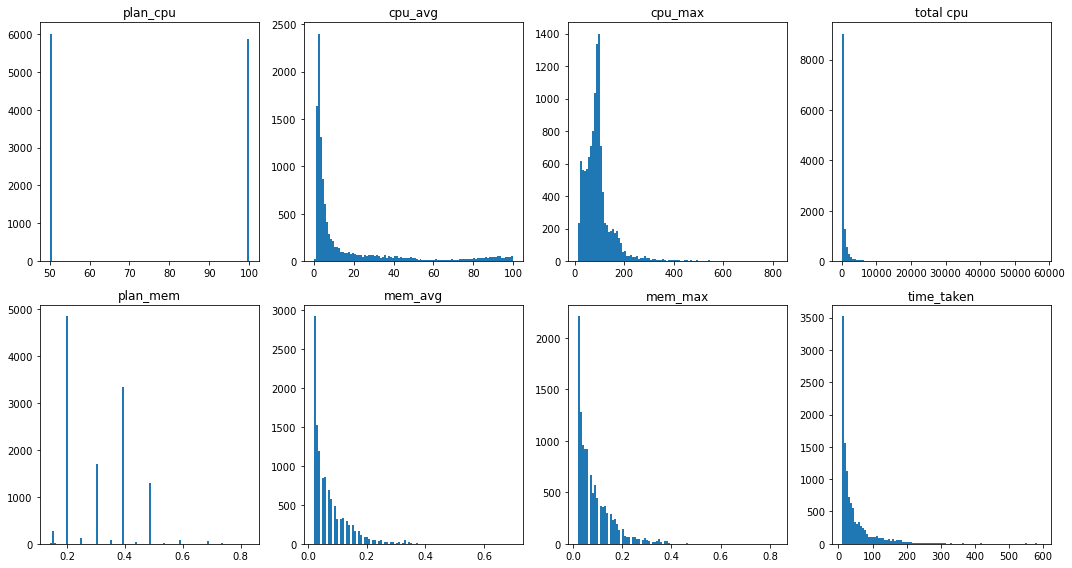

In [10]:
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
for ax, col in zip(axs.flatten(), ['plan_cpu', 'cpu_avg', 'cpu_max', 'total_cpu',
                                   'plan_mem', 'mem_avg', 'mem_max', 'time_taken']):
    ax.hist(alibaba[col], bins=100)
    ax.set_title(col)
plt.tight_layout()

Text(0.5, 1.0, 'Memory')

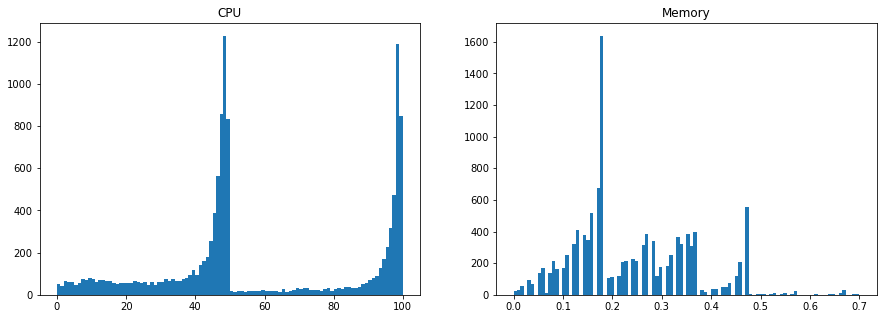

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(alibaba['plan_cpu'] - alibaba['cpu_avg'], bins=100)
axs[0].set_title('CPU')
axs[1].hist(alibaba['plan_mem'] - alibaba['mem_avg'], bins=100)
axs[1].set_title('Memory')

### Test alibaba model generation

In [5]:
import os
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [13]:
from src.extra.model import ModelDistribution
from src.extra.pprint import print_model

alibaba_model = ModelDistribution('../realistic.mdl', num_tasks=1000, num_servers=10)

In [15]:
tasks, servers = alibaba_model.generate()

Text(0.5, 1.0, 'Deadline')

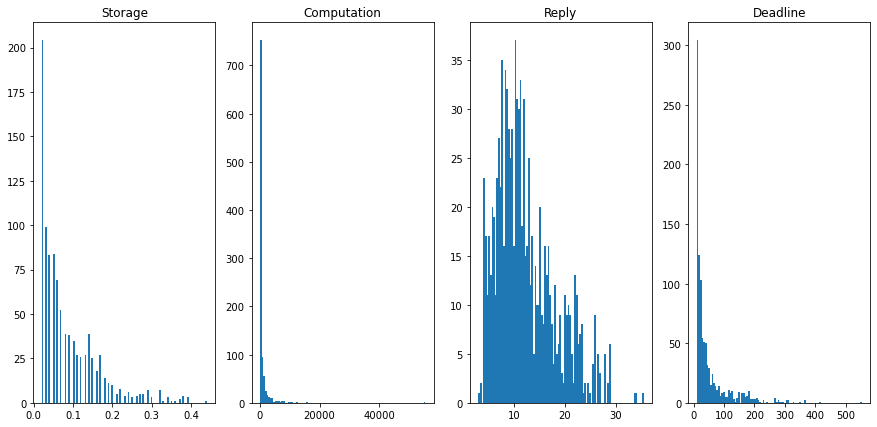

In [17]:
fig, axs = plt.subplots(1, 4, figsize=(15, 7))
axs[0].hist([task.required_storage for task in tasks], bins=100)
axs[0].set_title('Storage')
axs[1].hist([task.required_computation for task in tasks], bins=100)
axs[1].set_title('Computation')
axs[2].hist([task.required_reply for task in tasks], bins=100)
axs[2].set_title('Reply')
axs[3].hist([task.deadline for task in tasks], bins=100)
axs[3].set_title('Deadline')

In [12]:
task = tasks[0]
print('Name: ', task.name)
print('Storage: ', task.required_storage)
print('Computation: ', task.required_computation)
print('Results data: ', task.required_reply)
print('Value: ', task.value)

Name:  realistic 0
Storage:  0.02
Computation:  150.0
Results data:  10.200000000000001
Value:  -0.33
